# Challenge Data Scientist for NeuralWorks

## Instrucciones
- Debes entregar tu solución en un repositorio GitHub
- En el repositorio deben estar todos los archivos utilizados para la resolución de tu desafío. - La solución
debe estar implementada en un notebook .ipynb utilizando python 3, indicando claramente la pregunta que
estás resolviendo. No serán revisados otros lenguajes como R o similar.
- Recuerda que no estamos en tu cabeza! Escribe los supuestos que estás asumiendo. - Para este desafío te
recomendamos que describas claramente cómo mejorar cada parte de tu ejercicio en caso de que tenga
opción de mejora.
- Debes enviar el link al repositorio vía mail a rayen@neuralworks.cl contestando el correo en el que se te
envió este enunciado.

## Problema
El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de
Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila
corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

- Fecha-I : Fecha y hora programada del vuelo.
- Vlo-I : Número de vuelo programado.
- Ori-I : Código de ciudad de origen programado.
- Des-I : Código de ciudad de destino programado.
- Emp-I : Código aerolínea de vuelo programado.
- Fecha-O : Fecha y hora de operación del vuelo.
- Vlo-O : Número de vuelo de operación del vuelo.
- Ori-O : Código de ciudad de origen de operación
- Des-O : Código de ciudad de destino de operación.
- Emp-O : Código aerolínea de vuelo operado.
- DIA : Día del mes de operación del vuelo.
- MES : Número de mes de operación del vuelo
- AÑO : Año de operación del vuelo.
- DIANOM : Día de la semana de operación del vuelo.
- TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
- OPERA : Nombre de aerolínea que opera.
- SIGLAORI : Nombre ciudad origen.
- SIGLADES : Nombre ciudad destino.

## Debes resolver los siguientes puntos:

1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

- temporada_alta: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min: diferencia en minutos entre Fecha-O y Fecha-I.
- atraso_15: 1 si dif_min > 15, 0 si no.
- periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en
base a Fecha-I

3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo
de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso
de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías
mejorar la performance?

## Evaluación
Se tomará en cuenta para la evaluación:
- Elegancia y creatividad de la solución
- Orden del código
- Diseño de la solución
- Documentación

IDfile: 2afa61dad1feea9623b45009d53cf214

# Plan de ataque:

- Paso 1: Lectura 
- Paso 2: Exploración (EDA)
- Paso 3: Pre procesamiento (NAs, imputación, outliers)
- Paso 4: Respuestas del Punto 1
- Paso 5: Punto 2. Nuevas características (features) y exportarlas
- Paso 6: Respuestas del Punto 3
- Paso 7: Punto 4. Modelo 1
- Paso 8: Punto 4. Modelo 2

# Paso 1: Lectura

Importamos librerías básicas para la tarea y leemos la base cruda con pandas.
Al leer, existen columnas con tipo mixto de datos, por lo que pasamos toda columna no numérica a tipo string.

In [1]:
import pandas as pd
import os

In [2]:
raw = pd.read_csv('dataset_SCL.csv',
                  dtype={'Fecha-I':'str',
                         'Vlo-I':'str',
                         'Ori-I':'str',
                         'Des-I':'str',
                         'Emp-I':'str',
                         'Fecha-O':'str',
                         'Vlo-O':'str'})  # parseamos el tipo a str porque Vlo-I parece ser numérico y no lo es. Ej: "405A"

Redefinimos para comodidad:

In [3]:
df = raw
isinstance(df, pd.DataFrame)

True

# Paso 2: Exploración (EDA)

In [4]:
df.shape

(68206, 18)

Tenemos 68.206 registros y 18 posibles predictores `X1..X18` para nuestra variable respuesta `Y` o target (que, se sospecha, debe ser la dif entre Fecha-I y Fecha-O). Veamos cómo se ven:

In [5]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    Miami  
2  Santiago    Miami  
3  Santiago    Miami  
4  Santiago    Miami

Miramos los tipos de datos de cada columna. Recordemos que definimos str a toda no numérica.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


Miramos las fechas para tener contexto de tiempo.

In [7]:
print(df['Fecha-I'].min(), df['Fecha-I'].max())

2017-01-01 00:15:00 2017-12-31 23:55:00


In [8]:
print(df['Fecha-O'].min(), df['Fecha-O'].max())

2017-01-01 00:04:00 2018-01-01 00:12:00


Veamos la distribución de una columna de interés, por ej OPERA (Operador de vuelo):

<AxesSubplot:>

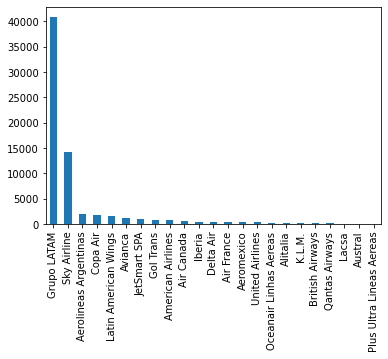

In [9]:
df['OPERA'].value_counts().plot(kind="bar")

In [10]:
df['OPERA'].value_counts().cumsum().head(2) / df['OPERA'].value_counts().sum()

Grupo LATAM    0.599537
Sky Airline    0.809166
Name: OPERA, dtype: float64

Grupo LATAM (60%) y Sky Airline (20%) lideran acumulando ~81% de los vuelos.

Veamos ahora la distribución por Año y Mes

In [11]:
freqByDate = df.groupby(['AÑO', 'MES']).size()
print(freqByDate)

AÑO   MES
2017  1      6106
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64


Hay 2 datos en 2018 que podríamos eliminar para cuadrar la ventana, pero los dejamos adentro porque son datos válidos.

Podemos verlo mejor gráficamente.

<AxesSubplot:>

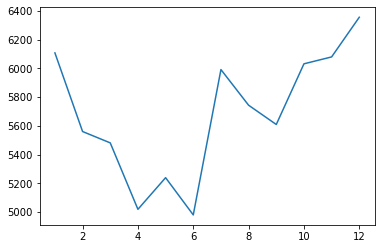

In [12]:
df.MES.value_counts().sort_index().plot(kind = 'line')

Mirando sólo descriptivamente la distribución de la cantidad de vuelos (operación) por fecha (agregación Año Mes) tenemos:

- Hay más vuelos en los meses Diciembre y Enero probablemente por vacaciones verano hemisferio sur.
- También aumentan en Julio probablemente por vacaciones de invierno hemisferio sur.
- Hay otro peak en Septiembre, supuestamente por feriados alrededor del 18, porque parten a mitad de la 2da semana.

Veamos la distribución de los días del MES.

<AxesSubplot:>

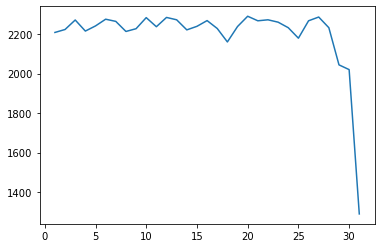

In [13]:
df.DIA.value_counts().sort_index().plot(kind = 'line')

- La baja final es por la diferencia de días totales de cada cada mes.
- No hay una predilección visible en los días del MES más allá de los weekends.

Escudriñemos las Horas más frecuente de vuelos según fecha de programada (Fecha-I):

In [14]:
pd.to_datetime(df['Fecha-I']).dt.hour.value_counts()

7     4882
8     4363
6     4199
18    4162
15    3884
14    3836
13    3675
11    3668
19    3591
17    3465
12    3412
9     3264
16    3072
20    2935
5     2514
10    2462
22    2320
21    2312
1     1573
23    1297
4     1092
0     1082
2      641
3      505
Name: Fecha-I, dtype: int64

- De 6:00 a 8:00 son las horas más frecuentes de vuelo planeado.

Pero si miramos las Horas de vuelo según fecha de operación (Fecha-O):

In [15]:
pd.to_datetime(df['Fecha-O']).dt.hour.value_counts()

7     4570
8     4341
18    3873
14    3866
6     3860
15    3834
19    3724
11    3552
13    3504
17    3491
9     3488
12    3440
16    3248
20    3034
5     2616
10    2564
21    2364
22    2249
1     1684
23    1354
4     1184
0     1155
2      665
3      546
Name: Fecha-O, dtype: int64

- De 7:00 a 8:00 son las horas más frecuentes de vuelo operativo.

Ahora, miremos los tipos de vuelos (nacionales o internacionales) de TIPOVUELO en proporción:

In [16]:
df.TIPOVUELO.value_counts(normalize=True)

N    0.541976
I    0.458024
Name: TIPOVUELO, dtype: float64

- El 46% de los vuelos son nacionales.
- El 54% de los vuelos son internacionales.

Avancemos y veamos las columnas SIGLAORI, Ori-I, Ori-O:

In [17]:
print(df.SIGLAORI.unique())
print(df["Ori-I"].unique())
print(df["Ori-O"].unique())

['Santiago']
['SCEL']
['SCEL']


- Sigla de origen (SIGLAORI) tiene el mismo dato en cada registro 'Santiago'. Esto quiere decir que sólo hay vuelos desde Santiago.
- Misma situación con Origen programado (ORI-I) y Origen operación (ORI-O).
- Desecharemos estas columna porque no aportan información.

Ahora observemos los destinos (SIGLADES):

In [18]:
df.SIGLADES.value_counts(normalize=True)

Buenos Aires      0.092880
Antofagasta       0.084831
Lima              0.077266
Calama            0.075448
Puerto Montt      0.063880
                    ...   
Quito             0.000029
Washington        0.000015
Pisco, Peru       0.000015
Puerto Stanley    0.000015
Cochabamba        0.000015
Name: SIGLADES, Length: 62, dtype: float64

El top 5 es:
- Buenos Aires
- Antofagasta
- Lima
- Calama
- Puerto Montt

# Paso 3: Pre-procesamiento de Valores faltantes y extremos

Importamos el módulo ML necesario para pre-procesamiento de datos

In [19]:
from sklearn import preprocessing

In [20]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [21]:
df.at[6068, 'Vlo-O']

nan

- Sólo la columna Vlo-O tiene un espacio en blanco en la fila 6068 que presumiblemente sería un número: 200.
- Supuesto: Dado que Vlo-I es también 200. Podemos quitar la linea completa o bien imputarlo. Es razonable llenar el dato faltante.


Lo llenamos

In [22]:
df.at[6068, 'Vlo-O'] = '200'

Lo revisamos

In [23]:

df.at[6068, 'Vlo-O']

'200'

Luego ya no tenemos NANs

In [24]:

df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        0
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

- Si bien la distribución de operadores está concentrada en pocos, no se consideran outliers. Además, gran parte de la data es categórica.
- Notar que luego de este preprocesamiento podriamos hacer EDA otra vez, pero no es necesario en este caso porque sólo llenamos 1 dato faltante.

## Paso 4: Respuestas del Punto 1 ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Resumen de una primera mirada:

- La lectura arroja columnas que tienen una mezcla de tipos de dato. Por eso pasamos lo no numérico a string.
- Fecha-I y Fecha-O tienen formato "m/d/aaaa hh:mm"
- I: Programado, significa lo planeado.
- O: Operación, significa lo que realmente ocurrió.


- Tenemos una ventana temporal de un año (2017). Llama la atención que hay 2 registros de Enero 2018 que pueden confundirse en Enero de 2017 si hacemos agregación por MES solamente, pero para temas de distribución lo omitiremos.

Resumen de variables:

- La proporción de vuelos por Operador es:
 - Grupo LATAM (60%) y Sky Airline (20%) lideran acumulando ~80% de los vuelos.
 

- Según la distribución de la cantidad de vuelos (operación) por fecha (agregación Año Mes) tenemos:
 - Hay más vuelos en los meses de Diciembre y Enero, probablemente por vacaciones verano hemisferio sur.
 - También aumentan en Julio, probablemente por vacaciones de invierno hemisferio sur.
 - Hay otro peak en Septiembre, supuestamente por feriados alrededor del 18 (fiestras patrias), porque parten a mitad de la 2da semana.


- En la distribución de vuelos por días:
 - La baja final es por la diferencia de días totales de cada cada mes.
 - No hay una predilección visible en los días del MES más allá de los weekends.


- En la distribución de vuelos por horas:
 - De 6:00 a 8:00 son las horas más frecuentes de vuelos planeados. Pero...
 - De 7:00 a 8:00 son las horas más frecuentes de vuelos operativos (reales).
 

- Tipos de vuelos: 
 - El 46% de los vuelos son nacionales.
 - El 54% de los vuelos son internacionales.
 

- El top 5 de destinos es:
 - Buenos Aires
 - Antofagasta
 - Lima
 - Calama
 - Puerto Montt
 

- Llama la atención que falta un dato en el registro posición 6068, que está en blanco. Pero hacemos imputación bajo el supuesto de que, salvo 120 casos, Vlo-I = Vlo-O; lo llenamos con el número 200.


- Hay 3 columnas: ORI-I, ORI-O y SIGLAORI, que tienen 1 sólo dato único en la columna, las dropearemos más adelante porque no aportan.



- Conclusión: me parece que habría que definir nuevas caracteristicas porque queremos modelar la diferencia entre las Fecha-I y Fecha-O, y en qué unidades medirlo. Definir también qué es un atraso. Además, según la distribución de vuelos en el año, podriamos decir algo sobre la temporada pues en verano (del hemisferio sur) hay más vuelos que en invierno.

En el paso 5 vamos a definir lo que necesitemos respecto a Features.

# Paso 5: Punto 2. Nuevas características (synthetic features) y exportarlas.

Definamos nuevas características (synthetic_features):

- 1. temporada_alta: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- 2. dif_min: diferencia en minutos entre Fecha-O y Fecha-I .
- 3. atraso_15: 1 si dif_min > 15, 0 si no.
- 4. periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.



### 5.1. Definimos temporada_alta

- Se realizó 5.4.periodo_dia antes que 5.1.temporada_alta, pero son similares.
- Supuesto 1: Sin incluir extremos de las fechas.
- Supuesto 2: la condición (Fecha-I está entre 15-Dic y 3-Mar) supone que es antes de 3-Mar y después de 15-Dic, para que tenga sentido la condición. De otro modo, tendríamos que llamar temporada alta entre el 3-Mar a 15 Dic, lo cuál estaría erroneo.


Importamos lo necesario para tratar con fechas.

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime

Cambiamos las fechas a objeto datatime

In [26]:
from datetime import datetime

df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')
df['Fecha-I']

0       2017-01-01 23:30:00
1       2017-01-02 23:30:00
2       2017-01-03 23:30:00
3       2017-01-04 23:30:00
4       2017-01-05 23:30:00
                ...        
68201   2017-12-22 14:55:00
68202   2017-12-25 14:55:00
68203   2017-12-27 14:55:00
68204   2017-12-29 14:55:00
68205   2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: datetime64[ns]

Extraemos la parte dia-mes-año de la fecha 

In [27]:
import numpy as np
import datetime

dateI = df['Fecha-I'].dt.date
#time = df['Fecha-I'].dt.strftime('%H:%M')
#dateI = pd.to_datetime(dateI, format='%Y-%m-%d %H:%M:%S')
dateI

0        2017-01-01
1        2017-01-02
2        2017-01-03
3        2017-01-04
4        2017-01-05
            ...    
68201    2017-12-22
68202    2017-12-25
68203    2017-12-27
68204    2017-12-29
68205    2017-12-31
Name: Fecha-I, Length: 68206, dtype: object

Probamos que funcione la comparación

In [28]:
dateI > datetime.date(2017, 1, 2)

0        False
1        False
2         True
3         True
4         True
         ...  
68201     True
68202     True
68203     True
68204     True
68205     True
Name: Fecha-I, Length: 68206, dtype: bool

Creamos la lista de condiciones

In [29]:
conditions = [
    (dateI < datetime.date(2017, 3,3)),       # está antes de 3-Mar
    (dateI > datetime.date(2017, 12, 15)),    # está después de 15-Dic 
    (dateI > datetime.date(2017, 7, 15)) & (dateI < datetime.date(2017, 7, 31)), # está entre 15-Jul y 31-Jul
    (dateI > datetime.date(2017, 9, 11)) & (dateI < datetime.date(2017, 9, 30))  # está entre 11-Sep y 30-Sep
    ]

Creamos la lista de valores para cada una de esas condiciones. Luego, creamos la nueva columna y usamos np.select para asignar valores según nuestra lista como argumentos.

In [30]:
values = ['1','1','1','1']

df['temporada_alta'] = np.select(conditions, values)

df['temporada_alta'] = df['temporada_alta']*1           # transformar falsos a 0
df['temporada_alta'] = df['temporada_alta'].astype(int) # lo quiero int32 igual que atraso_15

Revisamos la columna para corroborar.

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df[['Fecha-I', 'temporada_alta']])

                  Fecha-I  temporada_alta
0     2017-01-01 23:30:00               1
1     2017-01-02 23:30:00               1
2     2017-01-03 23:30:00               1
3     2017-01-04 23:30:00               1
4     2017-01-05 23:30:00               1
5     2017-01-06 23:30:00               1
6     2017-01-07 23:30:00               1
7     2017-01-08 23:30:00               1
8     2017-01-09 23:30:00               1
9     2017-01-11 23:30:00               1
10    2017-01-14 23:30:00               1
11    2017-01-16 23:30:00               1
12    2017-01-18 23:30:00               1
13    2017-01-21 23:30:00               1
14    2017-01-23 23:30:00               1
15    2017-01-25 23:30:00               1
16    2017-01-28 23:30:00               1
17    2017-01-30 23:30:00               1
18    2017-01-01 22:00:00               1
19    2017-01-02 22:00:00               1
20    2017-01-03 22:00:00               1
21    2017-01-04 22:00:00               1
22    2017-01-05 22:00:00         

También revisar que haya quedado con tipo int32.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

Tenemos lo que queremos, ahora pasemos al siguiente

### 5.2. Definimos dif_min

Revisamos qué tipo de objeto son las fechas

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

Cambiamos las fechas a objeto datatime

In [34]:
from datetime import datetime

df['Fecha-O'] = pd.to_datetime(df['Fecha-O'], errors='coerce')
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')

Revisamos que hayan cambiado a objeto tipo datatime

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  object        
 2   Ori-I           68206 non-null  object        
 3   Des-I           68206 non-null  object        
 4   Emp-I           68206 non-null  object        
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  object        
 7   Ori-O           68206 non-null  object        
 8   Des-O           68206 non-null  object        
 9   Emp-O           68206 non-null  object        
 10  DIA             68206 non-null  int64         
 11  MES             68206 non-null  int64         
 12  AÑO             68206 non-null  int64         
 13  DIANOM          68206 non-null  object        
 14  TIPOVUELO       68206 non-null  object        
 15  OP

Luego de cambiar el tipo, hacemos diferencia de tiempo, medido en minutos

In [36]:
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

Finalmente, queda definida la diferencia:

In [37]:
df['dif_min']

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Name: dif_min, Length: 68206, dtype: float64

Los números positivos indica la cantidad de minutos de atraso.
Notar que un número negativo implica que el vuelo llegó antes de lo esperado.

### 5.3. Definimos atraso_15

Vamos a definir un atraso cuando dif_min sean más de 15 min:

In [38]:
df['atraso_15'] = df['dif_min'] > 15 # def condición
df['atraso_15'] = df['atraso_15']*1  # convierte los falses en 0 y trues en 1

In [39]:
df['atraso_15']

0        0
1        0
2        0
3        0
4        0
        ..
68201    1
68202    1
68203    1
68204    0
68205    0
Name: atraso_15, Length: 68206, dtype: int32

### 5.4. Definimos periodo_dia

- Definimos: periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I. Quiero extraer hh:mm de cada fecha, y hacer condiciones.


- El pseudo sería así:
 - si (Fecha-I > 05:00) AND (Fecha-I < 11:59) then periodo_dia == "mañana"
 - si (Fecha-I > 12:00) AND (Fecha-I < 18:59) then periodo_dia == "tarde"
 - si (Fecha-I > 19:00) OR (Fecha-I < 04:59) then periodo_dia == "noche"




In [40]:
import numpy as np
from datetime import datetime

Extraemos la parte tiempo de la fecha 

In [41]:
time = df['Fecha-I'].dt.time
#time = df['Fecha-I'].dt.strftime('%H:%M')
time

0        23:30:00
1        23:30:00
2        23:30:00
3        23:30:00
4        23:30:00
           ...   
68201    14:55:00
68202    14:55:00
68203    14:55:00
68204    14:55:00
68205    14:55:00
Name: Fecha-I, Length: 68206, dtype: object

Comparamos según el pseudo-código anterior:

In [42]:
import datetime
time > datetime.time(19, 00)

0         True
1         True
2         True
3         True
4         True
         ...  
68201    False
68202    False
68203    False
68204    False
68205    False
Name: Fecha-I, Length: 68206, dtype: bool

Estos sí se pueden comparar, así que creamos la lista de condiciones:

In [43]:
conditions = [
    (time >= datetime.time(5, 00)) & (time <= datetime.time(11, 59)),
    (time >= datetime.time(12, 00)) & (time <= datetime.time(18, 59)),
    (time >= datetime.time(19, 00)),
    (time <= datetime.time(4, 59))
    ]

Creamos la lista de valores para cada una de esas condiciones

In [44]:
values = ['mañana', 'tarde', 'noche', 'noche']

Creamos la nueva columna y usamos np.select para asignar valores según nuestra lista como argumentos

In [45]:
df['periodo_dia'] = np.select(conditions, values)

Revisamos la columna para corroborar. Hay 27 periodo_dia == 0, veamos por qué.


In [46]:
x = df.pivot_table(
    index=['periodo_dia'], columns="atraso_15", aggfunc="size", fill_value=0
).reset_index()
x.columns.name = None
print(x)



  periodo_dia      0     1
0      mañana  21294  4058
1       noche  13878  3470
2       tarde  20420  5086


Aps, aquí hubo un error antes porque las condiciones estaban con símbolos estrictos (<, >), se solucionó cuando colocamos = pues la comparación es al minuto.
Solucionado, ahora ya no aparecen los ceros.

## 5.5: Exportamos las columnas creadas al archivo "synthetic_features.csv"

In [47]:
df.head(2)

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   

  Des-O Emp-O  ...   AÑO   DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017  Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017    Lunes          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  

[2 rows x 22 columns]

Exportamos las columnas a un csv en la misma carpeta, ordenados con el mismo índice que el dataset


In [48]:
export_columns = ['dif_min','atraso_15','periodo_dia','temporada_alta']
df.loc[:,export_columns].to_csv('synthetic_features.csv')

# Paso 6: Respuestas del Punto 3
1. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
2. ¿Qué variables esperarías que más influyeran en predecir atrasos?

Miremos el dataframe con los nuevos features

In [49]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  
2    Miami              1     9.0          0        noche  
3    Miami              1     3.0          0        noche  
4    Miami              1    -2.0          0        noche  

[5 rows x 22 columns]

- Preguntémonos por: destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo
- Preguntémonos por: SIGLADES, OPERA, MES, DIANOM, temporada_alta, TIPOVUELO
- Hagamos las agregaciones para entender qué sucede:

Espero que las variables influyentes en los atrasos sean:

- Vuelos: La concentración de cantidad de vuelos puede generar atrasos.
- Destino: Los destinos internacionales pueden provocar atrasos.
- Operador: Empresas con menos años y menos tecnología pueden generar atrasos.
- Temporada alta: Relacionada con la cantidad de vuelos, cuya concentración puede provocar atrasos.
- Tipo de vuelo: Las escalas pueden provocar atrasos y tenemos un 54% de vuelos internacionales.
- Hora: Hay más frecuencia de vuelos a las 7:00 y a las 8:00, y por concentración puede generar atrasos.

### Proporción de atrasos.

In [50]:
df['atraso_15'].value_counts(normalize=True)

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

- 18.5% de los vuelos se consideran atrasos.

### Atrasos agrupados por tipo de vuelo:

In [51]:
By_TIPOVUELO = df.groupby(['atraso_15','TIPOVUELO']).size()
By_TIPOVUELO

atraso_15  TIPOVUELO
0          I            24192
           N            31400
1          I             7048
           N             5566
dtype: int64

In [52]:
print(f"Tasa de atraso nacional: {round(5566/(5566+31400)*100, 1)} %")
print(f"Tasa de atraso internacional: {round(7048/(7048+24192)*100, 1)} %")

Tasa de atraso nacional: 15.1 %
Tasa de atraso internacional: 22.6 %


### Atrasos agrupados por temporada:

In [53]:
By_temporada_alta = df.groupby(['atraso_15','temporada_alta']).size() 
By_temporada_alta

atraso_15  temporada_alta
0          0                 38086
           1                 17506
1          0                  8480
           1                  4134
dtype: int64

In [54]:
print(f"Tasa de atraso en temporada alta: {round(4134/(4134+17506)*100, 1)} %")
print(f"Tasa de atraso en temporada baja: {round(8480/(8480+38086)*100, 1)} %")

Tasa de atraso en temporada alta: 19.1 %
Tasa de atraso en temporada baja: 18.2 %


En las celdas anteriores explicitamos el cálculo sólo para interpretación.

### Atrasos agrupados por operador:

In [55]:
By_OPERA = (
    df.loc[:,['OPERA', 'atraso_15', 'Fecha-I']].groupby(by=['OPERA', 'atraso_15']).count()*100 /
    df.loc[:,['OPERA', 'Fecha-I']].groupby(by=['OPERA']).count()
)
By_OPERA.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
OPERA                    atraso_15           
Plus Ultra Lineas Aereas 1          61.224490
Qantas Airways           1          57.948718
Air Canada               1          45.663717
Latin American Wings     1          40.681004
Gol Trans                1          35.607940
Avianca                  1          26.562500
Aerolineas Argentinas    1          24.012314
Austral                  1          20.270270
JetSmart SPA             1          17.899543
Grupo LATAM              1          17.866575
Sky Airline              1          17.764722
Oceanair Linhas Aereas   1          15.412186
British Airways          1          14.146341
Lacsa                    1          11.956522
Alitalia                 1          11.196911
Iberia                   1           9.944751
Air France               1           8.379888
K.L.M.                   1           8.366534
American Airlines        1           6.737120
Copa Air                 1           6.270270
Delta Air                1           5.865922
United Airlines          1           5.074627
Aeromexico               1           2.849003
                         0          97.150997
United Airlines          0          94.925373
Delta Air                0          94.134078
Copa Air                 0          93.729730
American Airlines        0          93.262880
K.L.M.                   0          91.633466
Air France               0          91.620112
Iberia                   0          90.055249
Alitalia                 0          88.803089
Lacsa                    0          88.043478
British Airways          0          85.853659
Oceanair Linhas Aereas   0          84.587814
Sky Airline              0          82.235278
Grupo LATAM              0          82.133425
JetSmart SPA             0          82.100457
Austral                  0          79.729730
Aerolineas Argentinas    0          75.987686
Avianca                  0          73.437500
Gol Trans                0          64.392060
Latin American Wings     0          59.318996
Air Canada               0          54.336283
Qantas Airways           0          42.051282
Plus Ultra Lineas Aereas 0          38.775510

Lideran las tasas de atrasos:
- Plus Ultra Lineas Aereas (61%)
- Qantas Airways (58%)
- Air Canada (45%) 

### Atrasos agrupados por destino:

In [56]:
pd.set_option('display.max_rows', 200)

By_SIGLADES = (
    df.loc[:,['SIGLADES', 'atraso_15', 'Fecha-I']].groupby(by=['SIGLADES', 'atraso_15']).count()*100 /
    df.loc[:,['SIGLADES', 'Fecha-I']].groupby(by=['SIGLADES']).count()
)
By_SIGLADES.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
SIGLADES         atraso_15            
Cochabamba       1          100.000000
Puerto Stanley   1          100.000000
Quito            1          100.000000
Ushuia           1           66.666667
Sydney           1           58.247423
Melbourne        1           53.846154
Bariloche        1           50.000000
Rosario          1           39.705882
Auckland N.Z.    1           37.396122
Punta Cana       1           33.333333
Toronto          1           31.448763
Cordoba          1           30.107527
Asuncion         1           28.448276
Rio de Janeiro   1           28.222997
Mendoza          1           27.261538
Orlando          1           26.470588
Tucuman          1           26.315789
Bogota           1           25.872818
Buenos Aires     1           25.572218
Los Angeles      1           25.161290
Santa Cruz       1           25.000000
Sao Paulo        1           24.684786
Lima             1           23.036053
San Juan, Arg.   1           22.857143
Nueva York       1           21.465969
Montevideo       1           20.637899
Isla de Pascua   1           19.690265
Guayaquil        1           19.431280
Osorno           1           19.305019
Miami            1           19.094488
Cancun           1           19.047619
Madrid           1           19.015660
Florianapolis    1           18.518519
Iquique          1           17.080331
Puerto Montt     1           16.846454
Punta del Este   1           16.666667
La Serena        1           16.182573
Concepcion       1           15.602304
Temuco           1           15.565856
Valdivia         1           15.537849
Punta Arenas     1           15.391924
La Paz           1           15.311005
Balmaceda        1           14.660310
Antofagasta      1           14.638783
Londres          1           14.146341
Copiapo          1           13.595506
Arica            1           13.546798
Calama           1           12.223086
Roma             1           11.196911
Neuquen          1           10.810811
Ciudad de Mexico 1            9.428571
Puerto Natales   1            8.860759
Paris            1            8.635097
Castro (Chiloe)  1            7.659574
Dallas           1            7.002801
Ciudad de Panama 1            6.270270
Atlanta          1            5.865922
Houston          1            5.089820
Cataratas Iguacu 0          100.000000
Curitiba, Bra.   0          100.000000
Pisco, Peru      0          100.000000
Washington       0          100.000000
Houston          0           94.910180
Atlanta          0           94.134078
Ciudad de Panama 0           93.729730
Dallas           0           92.997199
Castro (Chiloe)  0           92.340426
Paris            0           91.364903
Puerto Natales   0           91.139241
Ciudad de Mexico 0           90.571429
Neuquen          0           89.189189
Roma             0           88.803089
Calama           0           87.776914
Arica            0           86.453202
Copiapo          0           86.404494
Londres          0           85.853659
Antofagasta      0           85.361217
Balmaceda        0           85.339690
La Paz           0           84.688995
Punta Arenas     0           84.608076
Valdivia         0           84.462151
Temuco           0           84.434144
Concepcion       0           84.397696
La Serena        0           83.817427
Punta del Este   0           83.333333
Puerto Montt     0           83.153546
Iquique          0           82.919669
Florianapolis    0           81.481481
Madrid           0           80.984340
Cancun           0           80.952381
Miami            0           80.905512
Osorno           0           80.694981
Guayaquil        0           80.568720
Isla de Pascua   0           80.309735
Montevideo       0           79.362101
Nueva York       0           78.534031
San Juan, Arg.   0           77.142857
Lima             0           76.963947
Sao Paulo        0           75.315214
Santa Cruz       0           75.000000
Los Angeles      0           74.838710
Buenos Aires  

Los primeros 3 tienen sólo 1 viaje y fue atraso, por eso 100%.

### Atrasos agrupados por día de semana:

In [57]:
By_DIANOM = (
    df.loc[:,['DIANOM', 'atraso_15', 'Fecha-I']].groupby(by=['DIANOM', 'atraso_15']).count()*100 /
    df.loc[:,['DIANOM', 'Fecha-I']].groupby(by=['DIANOM']).count()
)
By_DIANOM.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
DIANOM    atraso_15           
Viernes   1          22.201710
Lunes     1          20.215181
Jueves    1          19.949273
Miercoles 1          17.084962
Martes    1          16.911613
Sabado    1          16.319444
Domingo   1          16.108616
          0          83.891384
Sabado    0          83.680556
Martes    0          83.088387
Miercoles 0          82.915038
Jueves    0          80.050727
Lunes     0          79.784819
Viernes   0          77.798290

- Viernes, Lunes y Jueves, son los días con más atrasos.
- Tasa atrasos Viernes: 22.2%
- Tasa atrasos Lunes: 20.2%
- Tasa atrasos Jueves: 19.9%

### Atrasos agrupados por mes:

In [58]:
By_MES = (
    df.loc[:,['MES', 'atraso_15', 'Fecha-I']].groupby(by=['MES', 'atraso_15']).count()*100 /
    df.loc[:,['MES', 'Fecha-I']].groupby(by=['MES']).count()
)
By_MES.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
MES atraso_15           
7   1          29.339119
12  1          25.409062
10  1          22.596154
11  1          19.720395
8   1          17.339833
9   1          17.237077
6   1          17.104999
1   1          16.011788
5   1          15.782443
2   1          15.159144
4   1          11.653386
3   1          11.510398
    0          88.489602
4   0          88.346614
2   0          84.840856
5   0          84.217557
1   0          83.988212
6   0          82.895001
9   0          82.762923
8   0          82.660167
11  0          80.279605
10  0          77.403846
12  0          74.590938
7   0          70.660881

- Tasa de atrasos según Mes:
    - Julio: 29%
    - Diciembre: 25%
    - Octubre: 23%

### Atrasos agrupados por periodo del día:

In [59]:
By_periodo_dia = (
    df.loc[:,['periodo_dia', 'atraso_15', 'Fecha-I']].groupby(by=['periodo_dia', 'atraso_15']).count()*100 /
    df.loc[:,['periodo_dia', 'Fecha-I']].groupby(by=['periodo_dia']).count()
)
By_periodo_dia.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
periodo_dia atraso_15           
noche       1          20.002306
tarde       1          19.940406
mañana      1          16.006627
            0          83.993373
tarde       0          80.059594
noche       0          79.997694

- Tasa de atrasos según Periodo del día:
    - noche: 20.00%
    - tarde: 19.94%
    - mañana: 16.00%

Ahora, veamos un poco de multivariado:

### Atrasos agrupados por tipo de vuelo y periodo del día:

In [60]:
By_periodo_dia_TIPOVUELO = (
    df.loc[:,['periodo_dia', 'TIPOVUELO', 'atraso_15', 'Fecha-I']].groupby(by=['periodo_dia', 'TIPOVUELO', 'atraso_15']).count()*100 /
    df.loc[:,['periodo_dia', 'TIPOVUELO', 'Fecha-I']].groupby(by=['periodo_dia', 'TIPOVUELO']).count()
)
By_periodo_dia_TIPOVUELO.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
periodo_dia TIPOVUELO atraso_15           
tarde       I         1          26.332654
mañana      I         1          21.229379
noche       I         1          20.210096
            N         1          19.663177
tarde       N         1          15.611232
mañana      N         1          12.500000
                      0          87.500000
tarde       N         0          84.388768
noche       N         0          80.336823
            I         0          79.789904
mañana      I         0          78.770621
tarde       I         0          73.667346

- Internacional de tarde tiene la mayor tasa de atraso (26.3%)

### Atrasos agrupados por día de la semana y operador:

In [61]:
pd.set_option('display.max_rows', 302)
By_OPERA_DIANOM = (
    df.loc[:,['OPERA', 'DIANOM', 'atraso_15', 'Fecha-I']].groupby(by=['OPERA', 'DIANOM', 'atraso_15']).count()*100 /
    df.loc[:,['OPERA', 'DIANOM', 'Fecha-I']].groupby(by=['OPERA', 'DIANOM']).count()
)
By_OPERA_DIANOM.sort_values(by=['atraso_15', 'Fecha-I'], ascending=[False, False])

Fecha-I
OPERA                    DIANOM    atraso_15            
Plus Ultra Lineas Aereas Martes    1          100.000000
                         Sabado    1          100.000000
Qantas Airways           Sabado    1          100.000000
Plus Ultra Lineas Aereas Lunes     1           66.666667
Air Canada               Miercoles 1           65.957447
Qantas Airways           Martes    1           64.444444
                         Viernes   1           61.224490
Plus Ultra Lineas Aereas Miercoles 1           60.000000
Qantas Airways           Miercoles 1           57.777778
Plus Ultra Lineas Aereas Viernes   1           52.941176
Latin American Wings     Viernes   1           51.056338
Air Canada               Viernes   1           49.253731
Gol Trans                Martes    1           48.837209
Air Canada               Jueves    1           48.780488
                         Martes    1           46.969697
Gol Trans                Jueves    1           45.744681
Latin American Wings     Lunes     1           44.982699
Qantas Airways           Domingo   1           44.897959
Air Canada               Domingo   1           44.444444
                         Lunes     1           42.574257
Latin American Wings     Sabado    1           41.780822
Gol Trans                Sabado    1           39.423077
Latin American Wings     Domingo   1           39.325843
Gol Trans                Miercoles 1           37.719298
Latin American Wings     Miercoles 1           37.262357
                         Jueves    1           35.271318
Gol Trans                Viernes   1           34.285714
Air Canada               Sabado    1           34.042553
Latin American Wings     Martes    1           33.593750
Aerolineas Argentinas    Viernes   1           33.101045
Avianca                  Sabado    1           32.236842
Austral                  Jueves    1           31.250000
Avianca                  Viernes   1           30.573248
Gol Trans                Lunes     1           30.075188
Avianca                  Miercoles 1           29.885057
Aerolineas Argentinas    Miercoles 1           29.390681
Avianca                  Domingo   1           27.380952
British Airways          Lunes     1           27.272727
Austral                  Domingo   1           26.666667
Oceanair Linhas Aereas   Domingo   1           25.641026
Avianca                  Jueves    1           25.443787
British Airways          Jueves    1           25.000000
Aerolineas Argentinas    Jueves    1           24.468085
JetSmart SPA             Viernes   1           24.183007
Avianca                  Martes    1           23.353293
Sky Airline              Viernes   1           23.233696
Aerolineas Argentinas    Lunes     1           22.807018
JetSmart SPA             Jueves    1           22.784810
Sky Airline              Lunes     1           22.636103
Aerolineas Argentinas    Domingo   1           22.222222
Gol Trans                Domingo   1           22.222222
Oceanair Linhas Aereas   Martes    1           21.621622
Aerolineas Argentinas    Martes    1           20.727273
Grupo LATAM              Viernes   1           20.520699
Sky Airline              Jueves    1           20.457730
JetSmart SPA             Lunes     1           19.883041
Grupo LATAM              Jueves    1           19.142493
                         Lunes     1           18.979424
JetSmart SPA             Miercoles 1           18.791946
Avianca                  Lunes     1           17.575758
Grupo LATAM              Sabado    1           17.184644
                         Domingo   1           16.733068
Lacsa                    Jueves    1           16.666667
                         Miercoles 1           16.666667
Oceanair Linhas Aereas   Jueves    1           16.666667
Grupo LATAM              Martes    1           16.407867
Sky Airline              Miercoles 1           16.098295
                         Martes    1           15.786802
JetSmart SPA             Martes    1           15.760870
Gr

Tasa de atrasos:
- Plus Ultra Lineas Aereas,	Lunes	67%
- Air Canada,	Miércoles	66%
- Qantas Airways,	Martes	64%

# Paso 7: Punto 4. Modelos

## Selección de características

A priori, las categóricas importantes serían:

- 0. atraso_15 (target)
- 1. temporada_alta
- 2. periodo_dia
- 3. DIANOM
- 4. OPERA
- 5. TIPOVUELO
- 6. MES (Esto es porque DIA ya está en periodo_dia y AÑO es despreciable porque tenemos casi pura data de 2017)

A priori no usaría las características:

- Fecha-I, Fecha-O: porque ya están capturadas en dif_min que fue usado para atraso_15. Sólo agregarán colinealidad.
- SIGLAORI, Ori-O, Ori-I: Son irrelevante por tener 1 sólo dato como vimos anteriormente.
- SIGLADES: Añadiría muchas categorías.

Por otro lado,

- Tenemos que pasar las features por el pipeline OneHotEncoding, es decir, transformar las variables categóricas a categorías, por ejemplo, periodo_dia: MAÑANA, TARDE, NOCHE a periodo_dia: 0, 1, 2. Pero agregándole el tipo: categoría.

Miremos el dataframe

In [62]:
df.head()

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   
3 2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00   226  SCEL   
4 2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00   226  SCEL   

  Des-O Emp-O  ...   AÑO     DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017    Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017      Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017     Martes          I  American Airlines  Santiago   
3  KMIA   AAL  ...  2017  Miercoles          I  American Airlines  Santiago   
4  KMIA   AAL  ...  2017     Jueves          I  American Airlines  Santiago   

  SIGLADES temporada_alta dif_min  atraso_15  periodo_dia  
0    Miami              1     3.0          0        noche  
1    Miami              1     9.0          0        noche  
2    Miami              1     9.0          0        noche  
3    Miami              1     3.0          0        noche  
4    Miami              1    -2.0          0        noche  

[5 rows x 22 columns]

Miremos nuestro target

In [63]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [64]:
count_no_sub = len(df[df['atraso_15']==0])
count_sub = len(df[df['atraso_15']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Porcentaje de No atrasos:", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Porcentaje de atrasos:", pct_of_sub*100)

Porcentaje de No atrasos: 81.50602586282731
Porcentaje de atrasos: 18.493974137172682


- **Tenemos un problema de clases desbalanceadas**
- Veamos las frecuencias de algunas features respecto del target.

Carguemos lo necesario

In [65]:
# lo necesario:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

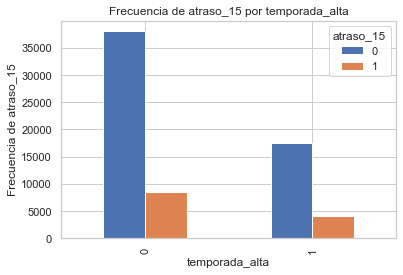

In [66]:
# ¿Es temporada_alta un buen predictor de atraso_15?
%matplotlib inline
pd.crosstab(df['temporada_alta'],df['atraso_15']).plot(kind='bar')
plt.title('Frecuencia de atraso_15 por temporada_alta')
plt.xlabel('temporada_alta')
plt.ylabel('Frecuencia de atraso_15')
#plt.savefig('Frecuencia de atraso_15 por temporada_alta')

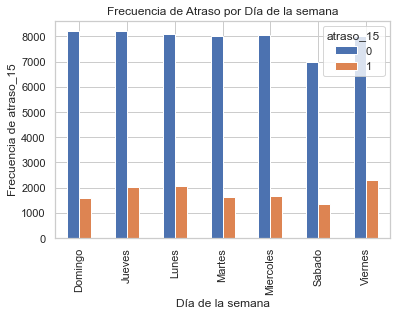

In [67]:
# ¿Es DIANOM un buen predictor de atraso_15?
%matplotlib inline
pd.crosstab(df['DIANOM'],df['atraso_15']).plot(kind='bar')
plt.title('Frecuencia de Atraso por Día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de atraso_15')
#plt.savefig('Frecuencia de Atraso por Día de la semana')

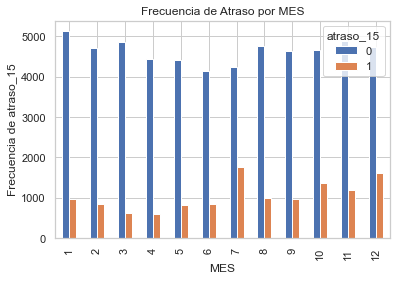

In [68]:
# ¿Es MES un buen predictor de atraso_15?
%matplotlib inline
pd.crosstab(df['MES'],df['atraso_15']).plot(kind='bar')
plt.title('Frecuencia de Atraso por MES')
plt.xlabel('MES')
plt.ylabel('Frecuencia de atraso_15')
#plt.savefig('Frecuencia de Atraso por MES')

- El plan es usar OneHotEncoding para tener todo numérico y categórico.
- Y luego dropear las columnas que encontremos que no nos sirvan.

Re-definimos el dataset con las features en df_res y el target en y_res

In [224]:
y_res = df['atraso_15']
df_res = df.drop(columns=['atraso_15',
                          'dif_min', # creada para armar target
                          #'Fecha-I', 'Fecha-O',
                          #'DIA', 'AÑO',
                          #'SIGLAORI', 'Ori-O', 'Ori-I',
                          #'SIGLADES',
                          
                          #'Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O', 'Emp-O'
                         ]
                )

In [225]:
df_res.head(3)

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   

  Des-O Emp-O  DIA  MES   AÑO   DIANOM TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL    1    1  2017  Domingo         I  American Airlines  Santiago   
1  KMIA   AAL    2    1  2017    Lunes         I  American Airlines  Santiago   
2  KMIA   AAL    3    1  2017   Martes         I  American Airlines  Santiago   

  SIGLADES  temporada_alta periodo_dia  
0    Miami               1       noche  
1    Miami               1       noche  
2    Miami               1       noche

In [226]:
classes_count = y_res.value_counts()
classes_count

0    55592
1    12614
Name: atraso_15, dtype: int64

- 23% de la proporción de la clase minoritaria implica un desbalance moderado.

Realizaremos una evaluación de validación cruzada para obtener una estimación del score de la prueba.

De base podríamos usar un clasificador que siempre predecirá la clase mayoritaria independientemente de las características que le demos proporcionadas.

In [227]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ["accuracy", "balanced_accuracy"]
cv_result = cross_validate(dummy_clf, df_res, y_res, scoring=scoring)
print(f"Accuracy score of a dummy classifier: {cv_result['test_accuracy'].mean():.3f}")

Accuracy score of a dummy classifier: 0.815


## 7.0 Métricas de rendimiento de modelos
En lugar de usar el típico accuracy solamente, podemos usar balanced_accuracy que considera el problema del equilibrio. Mostraremos varias.

Definición de las métricas:


Matriz de confución se compone de:

- True Positive: Correctly predicted event values
- True Negative: Correctly predicted no-event values
- False Positive: Incorrectly predicted event values
- False Negative: Incorrectly predicted no-event values


Métricas de rendimiento:

- Accuracy = TP/(TP+FP)
- Specificity = TN/(TN + FP)
- Recall = TP/(TP+FN)
- Balanced accuracy = arithmetic_mean(Accuracy, Epecificity)
- F1 = armonic_mean(Accuracy, Recall)


## 7.1 Partamos con un Dummy
Antes de entrenar un modelo ML, podemos almacenar los resultados obtenido con nuestra :class:`~sklearn.dummy.DummyClassifier`.

In [228]:
print(
    f"Balanced accuracy score of a dummy classifier: "
    f"{cv_result['test_balanced_accuracy'].mean():.3f}"
)

Balanced accuracy score of a dummy classifier: 0.500


Usaremos un diccionario y una lista para almacenar continuamente los resultados de nuestros experimentos y mostrarlos en un super dashboard de 2x2 de pandas.

In [229]:
index = []
scores = {"Accuracy": [], "Balanced accuracy": []}

In [230]:
import pandas as pd

index += ["Dummy classifier"]
cv_result = cross_validate(dummy_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier   0.81506                0.5

## 7.2 Clasificador lineal y Codificador
Crearemos un pipeline de ML utilizando un clasificador `~sklearn.linear_model.LogisticRegression`. Esto porqe necesitaremos codificar en caliente las columnas categóricas y estandarizar las columnas numéricas antes de meter los datos en al clasificador `~sklearn.linear_model.LogisticRegression`.

Primero, definimos los pipelines, numéricos y categóricos.

In [231]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder # Sí, mejor el OHE
from sklearn.pipeline import make_pipeline

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

Luego, podemos crear un preprocesador que enviará las columnas categóricas al pipeline categórico y las con números al pipeline de números.

In [232]:
# Pasamos a categórica las features con menos de 862 valores únicos. Arbitrariamente, vamos probando.
cols_to_exclude = ['dif_min'] # este tiene que ser numérico
for col in df_res.columns:
    if df_res[col].nunique() < 862 and col not in cols_to_exclude:
        df_res[col] = df_res[col].astype('category')
df_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha-I         68206 non-null  datetime64[ns]
 1   Vlo-I           68206 non-null  category      
 2   Ori-I           68206 non-null  category      
 3   Des-I           68206 non-null  category      
 4   Emp-I           68206 non-null  category      
 5   Fecha-O         68206 non-null  datetime64[ns]
 6   Vlo-O           68206 non-null  category      
 7   Ori-O           68206 non-null  category      
 8   Des-O           68206 non-null  category      
 9   Emp-O           68206 non-null  category      
 10  DIA             68206 non-null  category      
 11  MES             68206 non-null  category      
 12  AÑO             68206 non-null  category      
 13  DIANOM          68206 non-null  category      
 14  TIPOVUELO       68206 non-null  category      
 15  OP

In [233]:
df_res

Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O  Vlo-O  \
0     2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00    226   
1     2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00    226   
2     2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00    226   
3     2017-01-04 23:30:00   226  SCEL  KMIA   AAL 2017-01-04 23:33:00    226   
4     2017-01-05 23:30:00   226  SCEL  KMIA   AAL 2017-01-05 23:28:00    226   
...                   ...   ...   ...   ...   ...                 ...    ...   
68201 2017-12-22 14:55:00   400  SCEL  SPJC   JAT 2017-12-22 15:41:00  400.0   
68202 2017-12-25 14:55:00   400  SCEL  SPJC   JAT 2017-12-25 15:11:00  400.0   
68203 2017-12-27 14:55:00   400  SCEL  SPJC   JAT 2017-12-27 15:35:00  400.0   
68204 2017-12-29 14:55:00   400  SCEL  SPJC   JAT 2017-12-29 15:08:00  400.0   
68205 2017-12-31 14:55:00   400  SCEL  SPJC   JAT 2017-12-31 15:04:00  400.0   

      Ori-O Des-O Emp-O DIA MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0      SCEL  KMIA   AAL   1   1  2017    Domingo         I  American Airlines   
1      SCEL  KMIA   AAL   2   1  2017      Lunes         I  American Airlines   
2      SCEL  KMIA   AAL   3   1  2017     Martes         I  American Airlines   
3      SCEL  KMIA   AAL   4   1  2017  Miercoles         I  American Airlines   
4      SCEL  KMIA   AAL   5   1  2017     Jueves         I  American Airlines   
...     ...   ...   ...  ..  ..   ...        ...       ...                ...   
68201  SCEL  SPJC   JAT  22  12  2017    Viernes         I       JetSmart SPA   
68202  SCEL  SPJC   JAT  25  12  2017      Lunes         I       JetSmart SPA   
68203  SCEL  SPJC   JAT  27  12  2017  Miercoles         I       JetSmart SPA   
68204  SCEL  SPJC   JAT  29  12  2017    Viernes         I       JetSmart SPA   
68205  SCEL  SPJC   JAT  31  12  2017    Domingo         I       JetSmart SPA   

       SIGLAORI SIGLADES temporada_alta periodo_dia  
0      Santiago    Miami              1       noche  
1      Santiago    Miami              1       noche  
2      Santiago    Miami              1       noche  
3      Santiago    Miami              1       noche  
4      Santiago    Miami              1       noche  
...         ...      ...            ...         ...  
68201  Santiago     Lima              1       tarde  
68202  Santiago     Lima              1       tarde  
68203  Santiago     Lima              1       tarde  
68204  Santiago     Lima              1       tarde  
68205  Santiago     Lima              1       tarde  

[68206 rows x 20 columns]

Falta categorizar nuestro target.

In [234]:
y_res.dtype
# no es categórica

dtype('int32')

In [235]:
y_res = y_res.astype('category')
y_res.dtype
# Ahora sí

CategoricalDtype(categories=[0, 1], ordered=False)

In [236]:
# Ver que el 1 sea el atraso, y el 0 el no-atraso.
y_res.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: atraso_15, dtype: category
Categories (2, int64): [0, 1]

## 7.3 Clasificador logístico
Haremos un clasificador logístico sencillo pues el target tiene 2 valores.

In [237]:
# armamos los pipelines
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

Finalmente, conectamos nuestro preprocesador con `~sklearn.linear_model.LogisticRegression`.

Ahora podemos evaluar nuestro modelo.

In [238]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

In [239]:
index += ["Logistic regression"] # agregamos la RL a nuestro dashboard de scores
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring) # validación cruzadaaa

# colgamos resultados de Accuracy sin balancear
scores["Accuracy"].append(cv_result["test_accuracy"].mean()) 

# colgamos resultados de Accuracy CON balancear
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier     0.815060           0.500000
Logistic regression  0.509115           0.439609

Ahora, veamos un enfoque diferente para mejorar un poquito el rendimiento del modelo.

Usaremos `class_weight`

Se sabe que la mayoría de los modelos en `scikit-learn` tienen un parámetro `class_weight`. Este parámetro afectará el cálculo de la pérdida en el modelo lineal para penalizar de manera diferente una falsa clasificación de la clase minoritaria y mayoritaria. podemos establecer `class_weight="balanced"` tal que el peso aplicado es inversamente proporcional a la frecuencia de clase. Probamos esta parametrización en nuestro modelito lineal.

In [240]:
lr_clf.set_params(logisticregression__class_weight="balanced")

index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier                                 0.815060           0.500000
Logistic regression                              0.509115           0.439609
Logistic regression with balanced class weights  0.375519           0.418480

Muestreamos el conjunto de entrenamiento de nuevo, durante el aprendizaje.

Otra forma es volver a muestrear el conjunto de entrenamiento submuestreando o
sobremuestreando algunas de las muestras. `imbalanced-learn` proporciona algunas muestras
para hacer tal procesamiento.

In [241]:
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

lr_clf = make_pipeline_with_sampler(
    preprocessor_linear,
    RandomUnderSampler(random_state=42),
    LogisticRegression(max_iter=1000),
)

In [242]:
index += ["Submuestreo + Logistic regression"]
cv_result = cross_validate(lr_clf, df_res, y_res, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

Accuracy  Balanced accuracy
Dummy classifier                                 0.815060           0.500000
Logistic regression                              0.509115           0.439609
Logistic regression with balanced class weights  0.375519           0.418480
Submuestreo + Logistic regression                0.381208           0.418569

Bueno, si bien el Submuestreo+LogisticRegression (S+LR) en general sale mejor que la LogisticRegression (LR) sola (ver Balanced accuracy), vemos que ese mismo submuestreo no tiene mejor performance que el anterior Logistic regression, por tanto nos quedamos con ese: LR

## 7.4 Solución: Probabilidad de Atraso

La probabilidad de atraso entonces la podemos rescatar del modeloe LR:

"Logistic regression with balanced class weights" (Modelo de regresión logística con clase balanceada por pesos).

In [243]:
from sklearn.model_selection import cross_val_predict
proba = cross_val_predict(lr_clf, df_res, y_res, method='predict_proba') #
# model = lr_clf
# X = df_res
# y = y_res

In [244]:
with np.printoptions(threshold=np.inf):
    print(proba)

[[8.92959884e-01 1.07040116e-01]
 [8.07302114e-01 1.92697886e-01]
 [8.08788169e-01 1.91211831e-01]
 [8.07091785e-01 1.92908215e-01]
 [7.94005477e-01 2.05994523e-01]
 [8.74245472e-01 1.25754528e-01]
 [8.74245472e-01 1.25754528e-01]
 [8.73826650e-01 1.26173350e-01]
 [7.53786821e-01 2.46213179e-01]
 [7.69668005e-01 2.30331995e-01]
 [8.41111428e-01 1.58888572e-01]
 [7.27967845e-01 2.72032155e-01]
 [8.39402945e-01 1.60597055e-01]
 [8.42210974e-01 1.57789026e-01]
 [7.45861128e-01 2.54138872e-01]
 [8.25450548e-01 1.74549452e-01]
 [8.66665919e-01 1.33334081e-01]
 [7.82917147e-01 2.17082853e-01]
 [9.23292599e-01 7.67074011e-02]
 [8.58049621e-01 1.41950379e-01]
 [8.59212570e-01 1.40787430e-01]
 [8.57884932e-01 1.42115068e-01]
 [8.47593620e-01 1.52406380e-01]
 [7.86805636e-01 2.13194364e-01]
 [9.09343016e-01 9.06569837e-02]
 [9.09028922e-01 9.09710781e-02]
 [8.30903664e-01 1.69096336e-01]
 [8.15405179e-01 1.84594821e-01]
 [8.25925295e-01 1.74074705e-01]
 [8.28217627e-01 1.71782373e-01]
 [8.350424

In [245]:
with np.printoptions(threshold=np.inf):
    print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [246]:
# Veamos como quedan las probabilidades del modelo vs la realidad
dashboard = []
p = {"Probabilidad de Atraso": [], "Atraso": []}

dashboard += ["Registro 1"]
p["Atraso"].append(y_res[1])
p["Probabilidad de Atraso"].append(proba[1][1])

df_p = pd.DataFrame(p, index=dashboard)
df_p

Probabilidad de Atraso  Atraso
Registro 1                0.192698       0

In [247]:
dashboard += ["Registro 2"]
p["Atraso"].append(y_res[2])
p["Probabilidad de Atraso"].append(proba[2][1])

dashboard += ["Registro 3"]
p["Atraso"].append(y_res[3])
p["Probabilidad de Atraso"].append(proba[3][1])

dashboard += ["Registro 4"]
p["Atraso"].append(y_res[4])
p["Probabilidad de Atraso"].append(proba[4][1])

dashboard += ["Registro 100"]
p["Atraso"].append(y_res[100])
p["Probabilidad de Atraso"].append(proba[100][1])


df_p = pd.DataFrame(p, index=dashboard)
df_p

Probabilidad de Atraso  Atraso
Registro 1                  0.192698       0
Registro 2                  0.191212       0
Registro 3                  0.192908       0
Registro 4                  0.205995       0
Registro 100                0.643378       1

In [248]:
proba[1][1]

0.19269788615314365

In [249]:
proba[100][1]

0.6433780999999138

# Paso 8: Conclusiones y sugerencias

Recapitulando:

- Paso 1: Lectura. Leímos los datos definiendo el tipo a string por defecto pues habían columnas "numéricas" con datos como '405A', luego no eran numéricas.
- Paso 2: Exploración (EDA). 
- Paso 3: Pre procesamiento (NAs, imputación, outliers) de valores faltantes y extremos. Identificamos 1 solo dato faltante y lo llenamos, en general es mejor eliminar esos registros del análisis, pero en este caso era sólo 1 y era razonable llenarlo para tener 0 pérdida de información.
- Paso 4: Respuestas del Punto 1. Vimos como se distribuye la data, lo que llamó la atención y algunos comentarios sobre cada característica.
- Paso 5: Definimos nuevas características (synthetic_features). Construimos el target, además de medidas que buscaban componer algunas columnas anteriores.
- Paso 6: Respuestas del Punto 3. Compusimos las tasas de atraso de las features, y escogimos a priori algunas features.
- Paso 7: Punto 4. Modelos. Aquí hicimos el Encoder categórico y planteamos algunos modelos desde lo básico.
- Paso 8: Conclusiones y sugerencias

Link al repositorio GitHub: https://github.com/DarkHamlet/Chall_DS_Latam_NW


- Paso 1: Lectura 
- Paso 2: Exploración (EDA)
- Paso 3: Pre procesamiento (NAs, imputación, outliers)
- Paso 4: Respuestas del Punto 1
- Paso 5: Punto 2. Nuevas características (features) y exportarlas
- Paso 6: Respuestas del Punto 3
- Paso 7: Punto 4. Modelos
- Paso 8: Conclusiones


Sugerencias a posteriori:

- 1. Aplicar un submuestreador aleatorio antes del entrenamiento del modelo lineal, permite no enfocarse en la clase mayoritaria a costa de cometer más errores con muestras en la clase mayoritaria (o sea, disminuir precisión).
- 2. Podríamos aplicar cualquier tipo de muestreador y encontrar cuál de ellos funciona mejor en el dataset actual. En vez de eso, otra forma podría ser mediante el uso de clasificadores que se aplicarán al muestreo interno. Ejemplos de esto son el uso de algoritmos de balance específicos desde `imbalanced-learn`

- 2. Por otro lado, podríamos ir agregando modelos, el siguiente que sugeriría es un clasificador RandomForest, si bien los árboles de decisión son fáciles de interpretar, RandomForest no tanto, pero hay varias maneras de codear un RandomForest para mostrar el orden de importancia de las features respecto del target junto a todo el poder de ese algorimo.

- 3. También en el paso de tratamiento de datos podríamos desconsiderar el dato faltante y excluir también los 2 datos de 2018. De cualquier manera no hubise causado mayor diferencia.